In [49]:
#!pip install missingno

#Импортируем нужные библиотеки:
import numpy as np
import pandas as pd


In [50]:
# Загружаем набор данных:
df = pd.read_csv('C:/Users/WhiteKisa/Desktop/Python_Sripts/DataSets/MoviesOnStreamingPlatforms_updated.csv')
print(df.shape)
df.head()

# Набор данных содержит 9515 фильма и 15 признаков, описывающих каждый фильм. 

(9515, 17)


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [51]:
# Pandas isna возвращает недостающие значения, и мы применяем функцию суммы, 
# чтобы увидеть количество пропущенных значений в каждом столбце.
df.isna().sum()

Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                4177
IMDb                206
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
Directors           411
Genres              116
Country             254
Language            313
Runtime             319
dtype: int64

In [52]:
# В столбце «Age» много пропущенных значений. 
# Есть еще 6 столбцов с количеством пропущенных значений более 200. 
# Воспользуемся missingno, чтобы увидеть, 
# сможем ли мы лучше понять пропущенные значения: 

import missingno as msno
%matplotlib inline

# Мы импортировали библиотеку missingno. 
# Встроенная команда %matplotlib позволяет отображать визуализации в записной jupyter notebook. 
# Первый инструмент, который мы используем, - это матрица пропущенных значений.

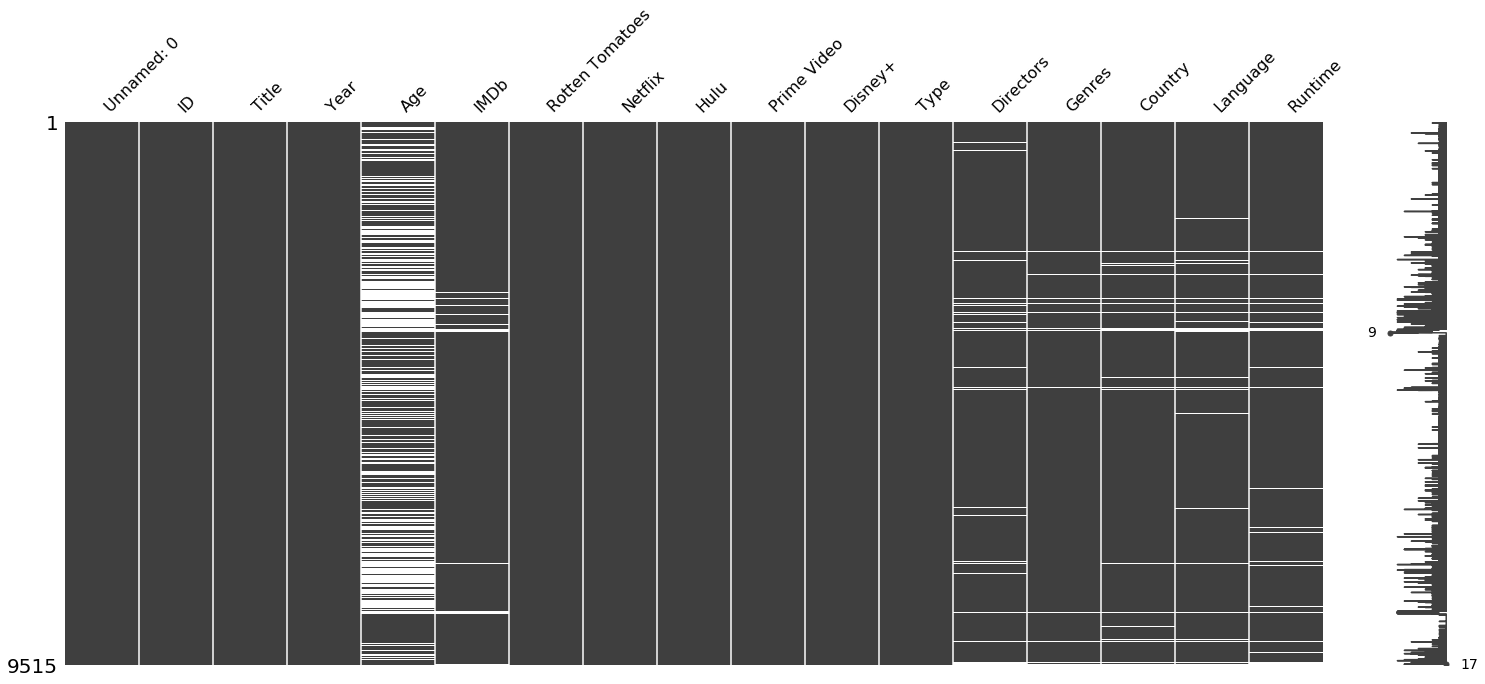

In [53]:
# Первый инструмент, который мы используем, - это матрица пропущенных значений.
msno.matrix(df)

# Белые линии обозначают пропущенные значения. 
# Как и следовало ожидать, в столбце Age преобладают белые строки. 
# Но есть интересная тенденция в других столбцах, в которых отсутствуют значения. 
# У них в большинстве случаев отсутствуют значения в общих строках. 
# Если в строке отсутствует значение в столбцах «Directors», скорее всего, 
# в ней отсутствуют значения в столбцах «Genres», «Country», «Language» и «Runtime». 
# Это очень ценная информация при работе с отсутствующими значениями.

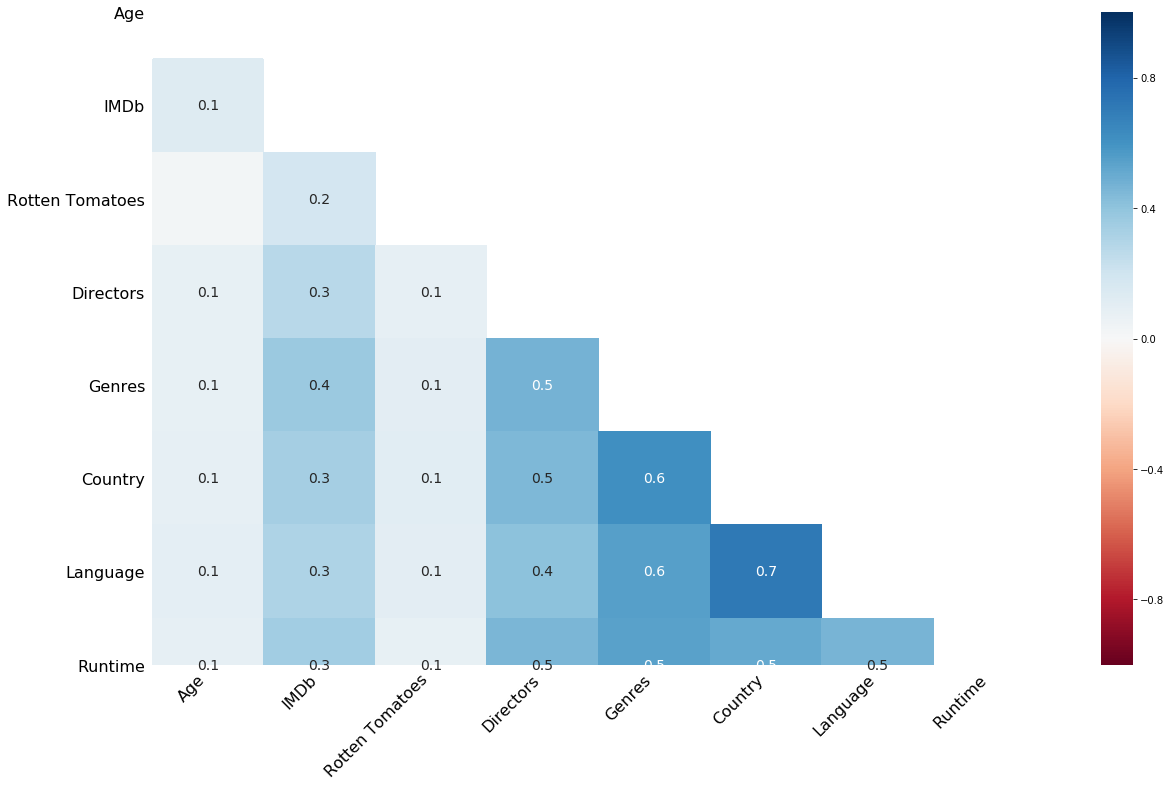

In [54]:
# Тепловые карты используются для визуализации матриц корреляции, 
# которые показывают корреляцию значений между различными столбцами. 
# Библиотека Missingno также предоставляет тепловые карты, которые показывают, 
# есть ли какая-либо корреляция между отсутствующими значениями в разных столбцах.

msno.heatmap(df)

# Положительная корреляция пропорциональна уровню темноты синего цвета, как показано полосой справа.
# Между столбцами «Directors», «Genres», «Country», «Language» и «Runtime» существуют 
# положительные корреляции на разных уровнях. 
# Наибольшая корреляция между «Language» и «Country» составляет 0,7. 
# Это подтверждает нашу интуицию по матрице пропущенных значений, поскольку в этих столбцах 
# отсутствуют значения в тех же строках.

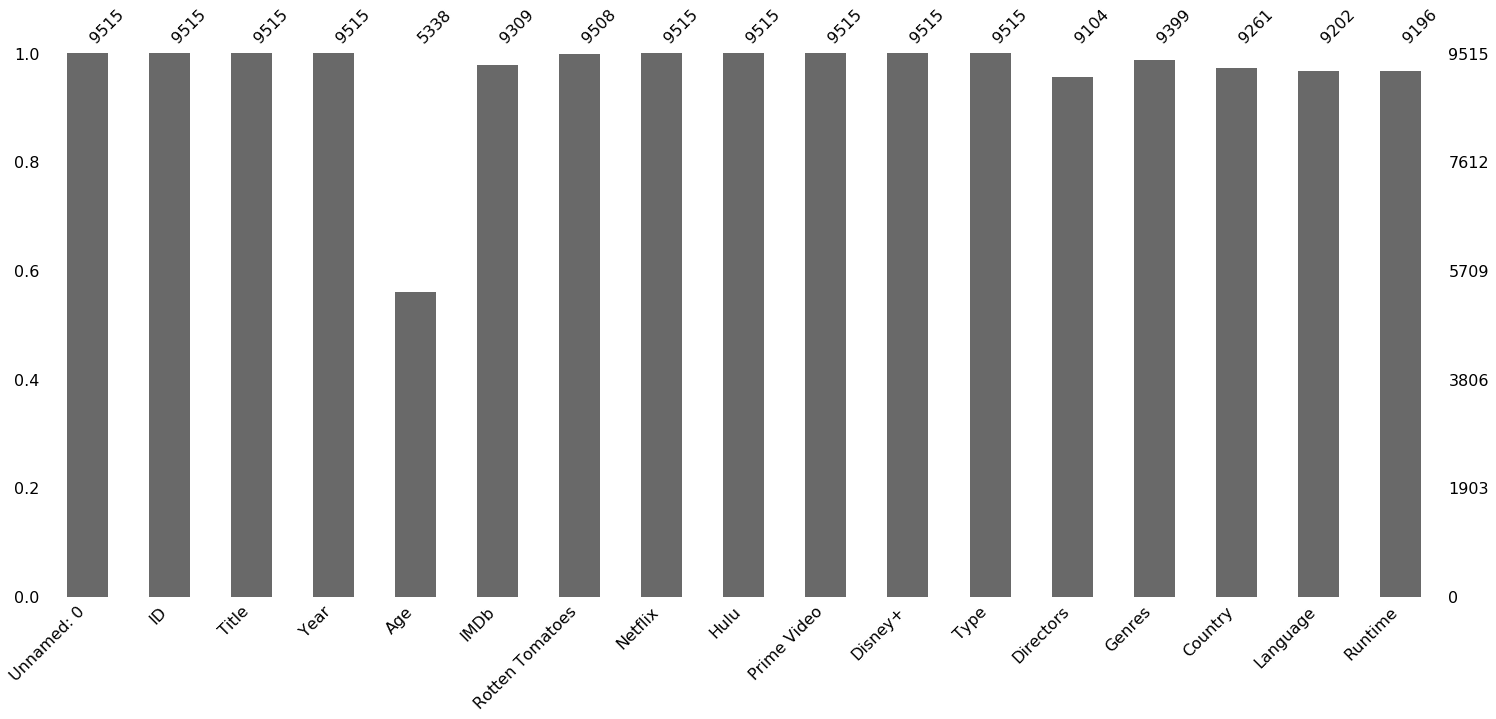

In [55]:
# Еще один инструмент missingno - это гистограмма пропущенных значений.

msno.bar(df)

# Она показывает столбцы, которые пропорциональны количеству не пропущенных значений, 
# а также предоставляют фактическое количество не пропущенных значений. 
# Мы получаем представление о том, какая часть каждого столбца отсутствует.

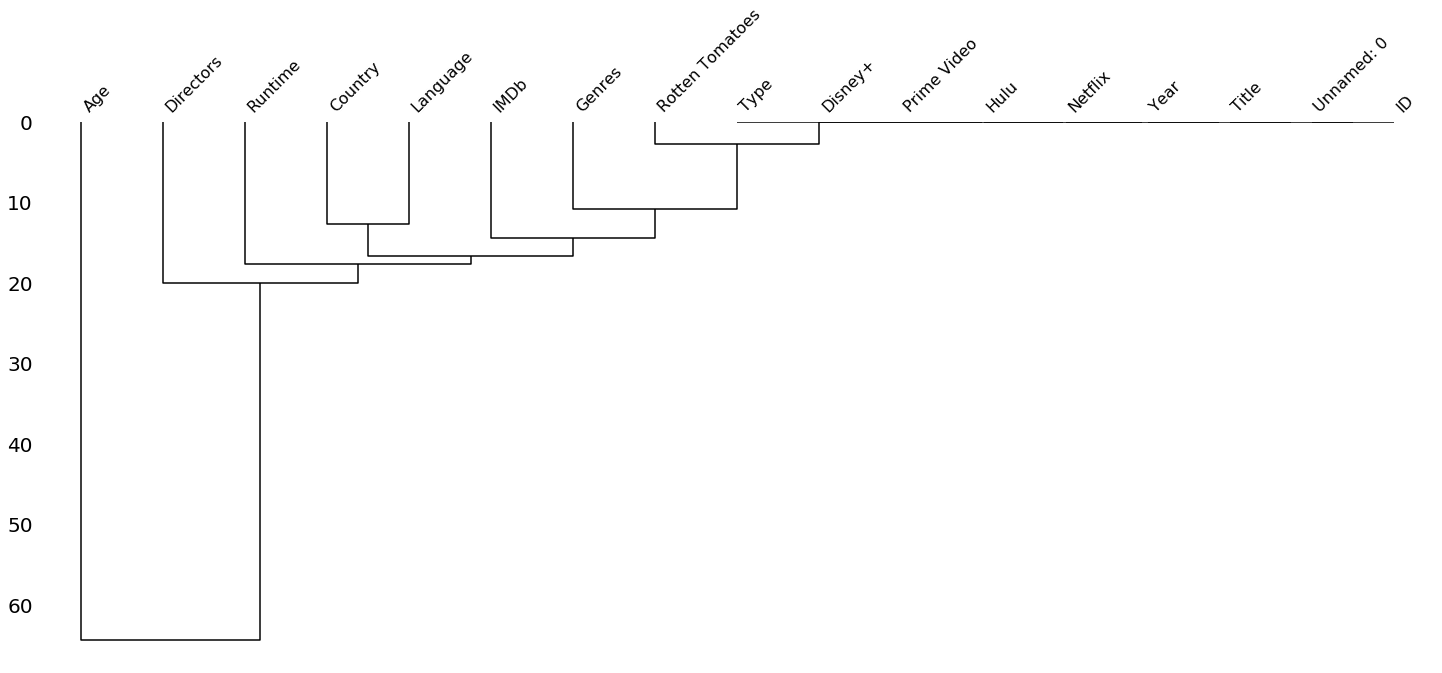

In [56]:
# Дендрограмма представляет собой древовидный график, сгенерированный посредством иерархической 
# кластеризации, и группирует столбцы, которые имеют сильную корреляцию по нулевым значениям.
# Если несколько столбцов сгруппированы вместе на нулевом уровне, то наличие нулей в одном 
# из этих столбцов напрямую связано с наличием или отсутствием нулей в других столбцах. 
# Чем больше разделены столбцы в дереве, тем меньше вероятность корреляции нулевых 
#значений между столбцами.

msno.dendrogram(df)